In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_to_load = "/Users/kathrynharris/Documents/matplotlib/Resources/mouse_metadata.csv"
study_results_to_load = "/Users/kathrynharris/Documents/matplotlib/Resources/study_results.csv"

# Read the mouse data and the study results
#mouse_metadata_to_load = pd.read_csv(mouse_metadata_path)
#study_results_to_load = pd.read_csv(study_results_path)

In [2]:
# Let's visualize

# mouse_metadata.head

In [3]:
# Next let's see the study_results

# study_results.head

In [4]:
# Combine the data into a single dataset

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_metadata = pd.read_csv(mouse_metadata_to_load)
study_results = pd.read_csv(study_results_to_load)

# Combine the data into a single dataset
study_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# check to see if there are duplicats

study_data['Mouse ID'].value_counts().head()

g989    13
k862    10
c758    10
m269    10
v923    10
Name: Mouse ID, dtype: int64

In [6]:
# There are duplicates, so check g989 to see if it is listed for more than one drug
mice_data = study_data.set_index('Mouse ID')
mouse = mice_data.loc['g989', :]
mouse.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26


In [7]:
# Delete the extra data (cleaning!)

clean_data_mice = mice_data.drop(index = 'g989')
clean_study_data = clean_data_mice.reset_index()
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# Check for duplicate mice

dupe_mice = study_data.groupby('Mouse ID')

# Count how many times duplicate mice appear

count_mice = dupe_mice['Mouse ID'].count()

count_mice

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Mouse ID, Length: 249, dtype: int64

In [9]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [10]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID.

In [11]:
# Calculate mean

# Create dataframe to store the Mean Tumor Volume Data Grouped by Drug
tumor_response_mean_df = pd.DataFrame(clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
tumor_response_mean_df = tumor_response_mean_df.reset_index()
# Preview DataFrame
tumor_response_mean_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565


In [19]:
# rename
tumor_response_mean_df = tumor_response_mean_df.rename(columns={'Tumor Volume (mm3)': 'Mean'})

In [16]:
# Calculate Standard Error
tumor_response_error_df = pd.DataFrame(clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem())
tumor_response_error_df = tumor_response_error_df.reset_index()
# Preview DataFrame
tumor_response_error_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466


In [20]:
# rename SEM

tumor_response_error_df = tumor_response_error_df.rename(columns={'Tumor Volume (mm3)': 'SEM'})

In [35]:
# Calculate the variance

# Create dataframe to store the variance Tumor Volume Data Grouped by Drug
tumor_response_var_df = pd.DataFrame(clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var())
tumor_response_var_df = tumor_response_var_df.reset_index()
# Preview DataFrame
tumor_response_var_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479


In [34]:
# Rename

tumor_response_var_df = tumor_response_var_df.rename(columns={'Tumor Volume (mm3)': 'Variance'})

In [38]:
# Calculate the median

# Create dataframe to store the variance Tumor Volume Data Grouped by Drug
tumor_response_med_df = pd.DataFrame(clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())
tumor_response_med_df = tumor_response_med_df.reset_index()
# Preview DataFrame
tumor_response_med_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285


In [39]:
# Rename median

tumor_response_med_df = tumor_response_med_df.rename(columns={'Tumor Volume (mm3)': 'Median'})

In [42]:
# Create summary table.

pd.merge(tumor_response_error_df, tumor_response_mean_df, on ='Drug Regimen')

,Drug Regimen,SEM,Mean
0,Capomulin,0.329346,40.675741
1,Ceftamin,0.469821,52.591172
2,Infubinol,0.492236,52.884795
3,Ketapril,0.603860,55.235638
4,Naftisol,0.596466,54.331565
5,Placebo,0.581331,54.033581
6,Propriva,0.544332,52.320930
7,Ramicane,0.320955,40.216745
8,Stelasyn,0.573111,54.233149
9,Zoniferol,0.516398,53.236507


In [22]:
# Print original data to visualize

clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


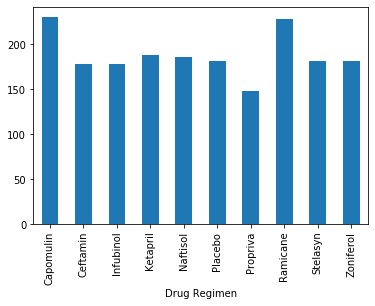

In [32]:
# Use Pandas Library to develop first bar plot.
drug_rows = clean_study_data.groupby('Drug Regimen').count()['Mouse ID']

drug_rows.plot(kind='bar')

Text(0.5, 1.0, 'Number of Mice per Timepoint per Treatment')

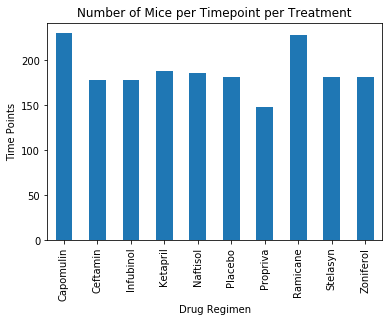

In [50]:
# Add labels and title

drug_rows = clean_study_data.groupby('Drug Regimen').count()['Mouse ID']

drug_rows.plot(kind='bar')

drug_rows.plot(kind="bar", x="Drug Regimen", y='Time Points', title="Number of Mice per Timepoint per Treatment")
plt.show()



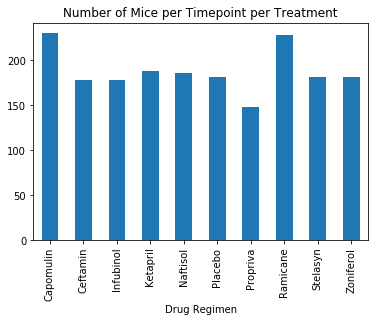

In [53]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot. 

# drug_rows = clean_study_data.groupby('Drug Regimen').count()['Mouse ID']

drug_rows = clean_study_data.groupby('Drug Regimen').count()['Mouse ID']

drug_rows.plot(kind="bar", x="Drug Regimen", y='Time Points', title="Number of Mice per Timepoint per Treatment")
plt.show()

In [76]:
# Actually use matplot.

x-axis = clean_study_data.groupby('Drug Regimen').count()['Mouse ID']


plt.xlabel("Drug Regimen")
plt.ylabel("Time Points")
plt.title("Number of Mice per Timepoint per Treatment")


SyntaxError: can't assign to operator (<ipython-input-76-07f60e7439cf>, line 3)

In [ ]:

plt.xlabel("Drug Regimen")
plt.ylabel("Time Points")
plt.title("Number of Mice per Timepoint per Treatment")

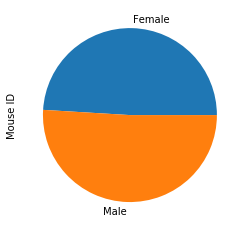

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender = clean_study_data.groupby('Sex').count()['Mouse ID']
mouse_gender.plot(kind='pie')

([<matplotlib.patches.Wedge at 0x7fd988984a90>,
 [Text(0.03308201408261561, 1.0995024239828841, ''),
  Text(-0.0330820140826155, -1.0995024239828841, '')])

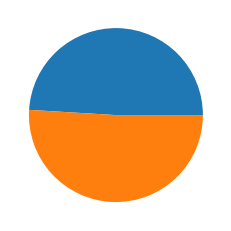

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = clean_study_data.groupby('Sex').count()['Mouse ID']
plt.pie(mouse_gender)

In [78]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Extract the top 4 regimenes from the data frame in order to perform IQR test on each
best_regimes = clean_study_data[clean_study_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
1600,Ceftamin,x226,0,45.000000
1475,Ceftamin,x581,0,45.000000
1465,Ceftamin,a275,0,45.000000
1455,Ceftamin,k210,0,45.000000
...,...,...,...,...
1811,Capomulin,g316,45,40.159220
1464,Ceftamin,k210,45,68.923185
460,Ramicane,j913,45,31.560470
1484,Ceftamin,x581,45,64.634949


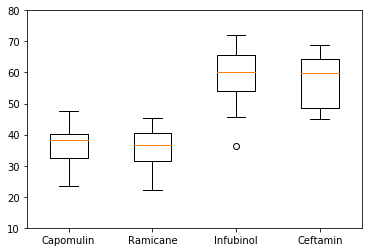

In [79]:
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()